<a href="https://colab.research.google.com/github/KangSeokha/RL_Book_Exercises/blob/main/RL_From_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CH5 MCLearning

In [ ]:
import random
import numpy as np

class GridWorld():
    def __init__(self):
        self.x=0
        self.y=0

    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1 # 보상은 항상 -1로 고정
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_right(self):
        self.y += 1
        if self.y > 3:
            self.y = 3

    def move_left(self):
        self.y -= 1
        if self.y < 0:
            self.y = 0

    def move_up(self):
        self.x -= 1
        if self.x < 0:
            self.x = 0

    def move_down(self):
        self.x += 1
        if self.x > 3:
            self.x = 3

    def is_done(self):
        if self.x == 3 and self.y == 3:
            return True
        else :
            return False

    def get_state(self):
        return (self.x, self.y)

    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

class Agent():
    def __init__(self):
        pass

    def select_action(self):
        coin = random.random()
        if coin < 0.25:
            action = 0
        elif coin < 0.5:
            action = 1
        elif coin < 0.75:
            action = 2
        else:
            action = 3
        return action


def main():
    env = GridWorld()
    agent = Agent()
    data = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    gamma = 1.0
    reward = -1
    alpha = 0.001

    for k in range(50000):
        done = False
        history = []

        while not done:
            action = agent.select_action()
            (x,y), reward, done = env.step(action)
            history.append((x,y,reward))
        env.reset()

        cum_reward = 0
        for transition in history[::-1]:
            x, y, reward = transition
            data[x][y] = data[x][y] + alpha*(cum_reward-data[x][y])
            cum_reward = reward + gamma*cum_reward  # 책에 오타가 있어 수정하였습니다

    for row in data:
        print(row)

if __name__ == '__main__':
    main()


[-58.820001613934416, -57.07861740280086, -51.399828193102046, -49.70203520800069]
[-57.27679042949309, -53.237622808419, -46.13648217439738, -40.309660909678776]
[-55.216717086501276, -48.57105422415603, -38.16426576494489, -26.951208969342204]
[-54.48645637066313, -45.55604512841754, -28.36910856418912, 0.0]


In [ ]:
#CH5 TD Learning

In [ ]:
import random
import numpy as np

class GridWorld():
    def __init__(self):
        self.x=0
        self.y=0

    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1 # 보상은 항상 -1로 고정
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_right(self):
        self.y += 1
        if self.y > 3:
            self.y = 3

    def move_left(self):
        self.y -= 1
        if self.y < 0:
            self.y = 0

    def move_up(self):
        self.x -= 1
        if self.x < 0:
            self.x = 0

    def move_down(self):
        self.x += 1
        if self.x > 3:
            self.x = 3

    def is_done(self):
        if self.x == 3 and self.y == 3:
            return True
        else :
            return False

    def get_state(self):
        return (self.x, self.y)

    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

class Agent():
    def __init__(self):
        pass

    def select_action(self):
        coin = random.random()
        if coin < 0.25:
            action = 0
        elif coin < 0.5:
            action = 1
        elif coin < 0.75:
            action = 2
        else:
            action = 3
        return action


def main():
    #TD
    env = GridWorld()
    agent = Agent()
    data = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    gamma = 1.0
    reward = -1
    alpha = 0.01

    for k in range(50000):
        done = False
        while not done:
            x, y = env.get_state()
            action = agent.select_action()
            (x_prime, y_prime), reward, done = env.step(action)
            x_prime, y_prime = env.get_state()
            data[x][y] = data[x][y] + alpha*(reward+gamma*data[x_prime][y_prime]-data[x][y])
        env.reset()

    for row in data:
        print(row)

if __name__ == '__main__':
    main()


[-59.595650566762544, -57.58225513271604, -54.3183835237772, -52.13358805795074]
[-57.76226647930214, -54.96324723349311, -50.63055740672823, -46.56402453174607]
[-54.441253105072164, -50.309955354996504, -42.38629890522122, -29.427410151380453]
[-51.897474812160034, -47.12607572187338, -33.477453064796855, 0]


In [ ]:
#CH6 MC Control

In [ ]:
import random
import numpy as np

class GridWorld():
    def __init__(self):
        self.x=0
        self.y=0

    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1  # 보상은 항상 -1로 고정
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_left(self):
        if self.y==0:
            pass
        elif self.y==3 and self.x in [0,1,2]:
            pass
        elif self.y==5 and self.x in [2,3,4]:
            pass
        else:
            self.y -= 1

    def move_right(self):
        if self.y==1 and self.x in [0,1,2]:
            pass
        elif self.y==3 and self.x in [2,3,4]:
            pass
        elif self.y==6:
            pass
        else:
            self.y += 1

    def move_up(self):
        if self.x==0:
            pass
        elif self.x==3 and self.y==2:
            pass
        else:
            self.x -= 1

    def move_down(self):
        if self.x==4:
            pass
        elif self.x==1 and self.y==4:
            pass
        else:
            self.x+=1

    def is_done(self):
        if self.x==4 and self.y==6: # 목표 지점인 (4,6)에 도달하면 끝난다
            return True
        else:
            return False

    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

class QAgent():
    def __init__(self):
        self.q_table = np.zeros((5, 7, 4)) # q벨류를 저장하는 변수. 모두 0으로 초기화.
        self.eps = 0.9
        self.alpha = 0.01

    def select_action(self, s):
        # eps-greedy로 액션을 선택
        x, y = s
        coin = random.random()
        if coin < self.eps:
            action = random.randint(0,3)
        else:
            action_val = self.q_table[x,y,:]
            action = np.argmax(action_val)
        return action

    def update_table(self, history):
        # 한 에피소드에 해당하는 history를 입력으로 받아 q 테이블의 값을 업데이트 한다
        cum_reward = 0
        for transition in history[::-1]:
            s, a, r, s_prime = transition
            x,y = s
            # 몬테 카를로 방식을 이용하여 업데이트.
            self.q_table[x,y,a] = self.q_table[x,y,a] + self.alpha * (cum_reward - self.q_table[x,y,a])
            cum_reward = cum_reward + r

    def anneal_eps(self):
        self.eps -= 0.03
        self.eps = max(self.eps, 0.1)

    def show_table(self):
        # 학습이 각 위치에서 어느 액션의 q 값이 가장 높았는지 보여주는 함수
        q_lst = self.q_table.tolist()
        data = np.zeros((5,7))
        for row_idx in range(len(q_lst)):
            row = q_lst[row_idx]
            for col_idx in range(len(row)):
                col = row[col_idx]
                action = np.argmax(col)
                data[row_idx, col_idx] = action
        print(data)

def main():
    env = GridWorld()
    agent = QAgent()

    for n_epi in range(1000): # 총 1,000 에피소드 동안 학습
        done = False
        history = []

        s = env.reset()
        while not done: # 한 에피소드가 끝날 때 까지
            a = agent.select_action(s)
            s_prime, r, done = env.step(a)
            history.append((s, a, r, s_prime))
            s = s_prime
        agent.update_table(history) # 히스토리를 이용하여 에이전트를 업데이트
        agent.anneal_eps()

    agent.show_table() # 학습이 끝난 결과를 출력

if __name__ == '__main__':
    main()


[[2. 3. 0. 2. 2. 2. 3.]
 [2. 3. 0. 1. 2. 3. 3.]
 [3. 3. 0. 1. 0. 3. 0.]
 [3. 3. 3. 1. 0. 3. 3.]
 [2. 2. 2. 1. 0. 2. 0.]]


In [ ]:
#CH6 QLearning

In [ ]:
import random
import numpy as np

class GridWorld():
    def __init__(self):
        self.x=0
        self.y=0

    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1 # 보상은 항상 -1로 고정
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_left(self):
        if self.y==0:
            pass
        elif self.y==3 and self.x in [0,1,2]:
            pass
        elif self.y==5 and self.x in [2,3,4]:
            pass
        else:
            self.y -= 1

    def move_right(self):
        if self.y==1 and self.x in [0,1,2]:
            pass
        elif self.y==3 and self.x in [2,3,4]:
            pass
        elif self.y==6:
            pass
        else:
            self.y += 1

    def move_up(self):
        if self.x==0:
            pass
        elif self.x==3 and self.y==2:
            pass
        else:
            self.x -= 1

    def move_down(self):
        if self.x==4:
            pass
        elif self.x==1 and self.y==4:
            pass
        else:
            self.x+=1

    def is_done(self):
        if self.x==4 and self.y==6:
            return True
        else:
            return False

    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

class QAgent():
    def __init__(self):
        self.q_table = np.zeros((5, 7, 4)) # 마찬가지로 Q 테이블을 0으로 초기화
        self.eps = 0.9

    def select_action(self, s):
        # eps-greedy로 액션을 선택해준다
        x, y = s
        coin = random.random()
        if coin < self.eps:
            action = random.randint(0,3)
        else:
            action_val = self.q_table[x,y,:]
            action = np.argmax(action_val)
        return action

    def update_table(self, transition):
        s, a, r, s_prime = transition
        x,y = s
        next_x, next_y = s_prime
        a_prime = self.select_action(s_prime) # S'에서 선택할 액션 (실제로 취한 액션이 아님)
        # Q러닝 업데이트 식을 이용
        self.q_table[x,y,a] = self.q_table[x,y,a] + 0.1 * (r + np.amax(self.q_table[next_x,next_y,:]) - self.q_table[x,y,a])

    def anneal_eps(self):
        self.eps -= 0.01  # Q러닝에선 epsilon 이 좀더 천천히 줄어 들도록 함.
        self.eps = max(self.eps, 0.2)

    def show_table(self):
        q_lst = self.q_table.tolist()
        data = np.zeros((5,7))
        for row_idx in range(len(q_lst)):
            row = q_lst[row_idx]
            for col_idx in range(len(row)):
                col = row[col_idx]
                action = np.argmax(col)
                data[row_idx, col_idx] = action
        print(data)


def main():
    env = GridWorld()
    agent = QAgent()

    for n_epi in range(1000):
        done = False

        s = env.reset()
        while not done:
            a = agent.select_action(s)
            s_prime, r, done = env.step(a)
            agent.update_table((s,a,r,s_prime))
            s = s_prime
        agent.anneal_eps()

    agent.show_table()

if __name__ == '__main__':
    main()


[[3. 3. 0. 0. 3. 2. 3.]
 [3. 3. 0. 2. 2. 3. 3.]
 [2. 3. 0. 1. 0. 3. 3.]
 [2. 2. 2. 1. 0. 3. 3.]
 [1. 1. 2. 1. 0. 2. 0.]]


In [ ]:
#CH6 SARSA

In [ ]:
import random
import numpy as np

class GridWorld():
    def __init__(self):
        self.x=0
        self.y=0

    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1  # 보상은 항상 -1로 고정
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_left(self):
        if self.y==0:
            pass
        elif self.y==3 and self.x in [0,1,2]:
            pass
        elif self.y==5 and self.x in [2,3,4]:
            pass
        else:
            self.y -= 1

    def move_right(self):
        if self.y==1 and self.x in [0,1,2]:
            pass
        elif self.y==3 and self.x in [2,3,4]:
            pass
        elif self.y==6:
            pass
        else:
            self.y += 1

    def move_up(self):
        if self.x==0:
            pass
        elif self.x==3 and self.y==2:
            pass
        else:
            self.x -= 1

    def move_down(self):
        if self.x==4:
            pass
        elif self.x==1 and self.y==4:
            pass
        else:
            self.x+=1

    def is_done(self):
        if self.x==4 and self.y==6: # 목표 지점인 (4,6)에 도달하면 끝난다
            return True
        else:
            return False

    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

class QAgent():
    def __init__(self):
        self.q_table = np.zeros((5, 7, 4)) # 마찬가지로 Q 테이블을 0으로 초기화
        self.eps = 0.9

    def select_action(self, s):
        # eps-greedy로 액션을 선택해준다
        x, y = s
        coin = random.random()
        if coin < self.eps:
            action = random.randint(0,3)
        else:
            action_val = self.q_table[x,y,:]
            action = np.argmax(action_val)
        return action

    def update_table(self, transition):
        s, a, r, s_prime = transition
        x,y = s
        next_x, next_y = s_prime
        a_prime = self.select_action(s_prime) # S'에서 선택할 액션 (실제로 취한 액션이 아님)
        # SARSA 업데이트 식을 이용
        self.q_table[x,y,a] = self.q_table[x,y,a] + 0.1 * (r + self.q_table[next_x,next_y,a_prime] - self.q_table[x,y,a])

    def anneal_eps(self):
        self.eps -= 0.03
        self.eps = max(self.eps, 0.1)

    def show_table(self):
        q_lst = self.q_table.tolist()
        data = np.zeros((5,7))
        for row_idx in range(len(q_lst)):
            row = q_lst[row_idx]
            for col_idx in range(len(row)):
                col = row[col_idx]
                action = np.argmax(col)
                data[row_idx, col_idx] = action
        print(data)


def main():
    env = GridWorld()
    agent = QAgent()

    for n_epi in range(1000):
        done = False

        s = env.reset()
        while not done:
            a = agent.select_action(s)
            s_prime, r, done = env.step(a)
            agent.update_table((s,a,r,s_prime))
            s = s_prime
        agent.anneal_eps()

    agent.show_table()


if __name__ == '__main__':
    main()


[[2. 3. 0. 0. 3. 2. 3.]
 [2. 3. 0. 2. 2. 3. 3.]
 [2. 3. 0. 1. 0. 2. 3.]
 [2. 2. 2. 1. 0. 3. 3.]
 [3. 3. 2. 1. 0. 2. 0.]]


In [ ]:
#CH7 Cosine Fitting

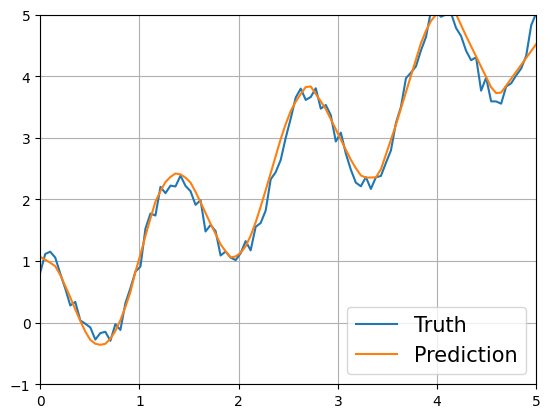

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 1, bias=False)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

def true_fun(X):
    noise = np.random.rand(X.shape[0]) * 0.4 - 0.2
    return np.cos(1.5 * np.pi * X) + X + noise

def plot_results(model):
    x = np.linspace(0, 5, 100)
    input_x = torch.from_numpy(x).float().unsqueeze(1)
    plt.plot(x, true_fun(x), label="Truth")
    plt.plot(x, model(input_x).detach().numpy(), label="Prediction")
    plt.legend(loc='lower right',fontsize=15)
    plt.xlim((0, 5))
    plt.ylim((-1, 5))
    plt.grid()

def main():
    data_x = np.random.rand(10000) * 5 # 0~5 사이 숫자 1만개를 샘플링하여 인풋으로 사용
    model = Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for step in range(10000):
        batch_x = np.random.choice(data_x, 32) # 랜덤하게 뽑힌 32개의 데이터로 mini-batch를 구성
        batch_x_tensor = torch.from_numpy(batch_x).float().unsqueeze(1)
        pred = model(batch_x_tensor)

        batch_y = true_fun(batch_x)
        truth = torch.from_numpy(batch_y).float().unsqueeze(1)
        loss = F.mse_loss(pred, truth) # 손실 함수인 MSE를 계산하는 부분

        optimizer.zero_grad()
        loss.mean().backward() # 역전파를 통한 그라디언트 계산이 일어나는 부분
        optimizer.step() # 실제로 파라미터를 업데이트 하는 부분

    plot_results(model)

if __name__ == '__main__':
    main()


In [ ]:
#CH8 DQN

In [ ]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 50000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)

    def put(self, transition):
        self.buffer.append(transition)

    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []

        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)

    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else :
            return out.argmax().item()

def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    env = gym.make('CartPole-v1')
    q = Qnet()
    q_target = Qnet()
    q_target.load_state_dict(q.state_dict())
    memory = ReplayBuffer()

    print_interval = 20
    score = 0.0
    optimizer = optim.Adam(q.parameters(), lr=learning_rate)

    for n_epi in range(10000):
        epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
        s = env.reset()
        done = False

        while not done:
            a = q.sample_action(torch.from_numpy(s).float(), epsilon)
            s_prime, r, done, info = env.step(a)
            done_mask = 0.0 if done else 1.0
            memory.put((s,a,r/100.0,s_prime, done_mask))
            s = s_prime

            score += r
            if done:
                break

        if memory.size()>2000:
            train(q, q_target, memory, optimizer)

        if n_epi%print_interval==0 and n_epi!=0:
            q_target.load_state_dict(q.state_dict())
            print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                            n_epi, score/print_interval, memory.size(), epsilon*100))
            score = 0.0
    env.close()

if __name__ == '__main__':
    main()


n_episode :20, score : 9.9, n_buffer : 199, eps : 7.9%
n_episode :40, score : 9.6, n_buffer : 391, eps : 7.8%
n_episode :60, score : 9.4, n_buffer : 579, eps : 7.7%
n_episode :80, score : 9.8, n_buffer : 774, eps : 7.6%
n_episode :100, score : 10.1, n_buffer : 976, eps : 7.5%
n_episode :120, score : 9.6, n_buffer : 1167, eps : 7.4%
n_episode :140, score : 9.7, n_buffer : 1360, eps : 7.3%
n_episode :160, score : 9.8, n_buffer : 1556, eps : 7.2%
n_episode :180, score : 9.6, n_buffer : 1747, eps : 7.1%
n_episode :200, score : 9.9, n_buffer : 1945, eps : 7.0%


<ipython-input-7-871dc58d492f>:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \


n_episode :220, score : 13.2, n_buffer : 2210, eps : 6.9%
n_episode :240, score : 10.4, n_buffer : 2419, eps : 6.8%
n_episode :260, score : 9.8, n_buffer : 2614, eps : 6.7%
n_episode :280, score : 9.9, n_buffer : 2813, eps : 6.6%
n_episode :300, score : 11.3, n_buffer : 3040, eps : 6.5%
n_episode :320, score : 14.7, n_buffer : 3333, eps : 6.4%
n_episode :340, score : 46.6, n_buffer : 4265, eps : 6.3%
n_episode :360, score : 99.5, n_buffer : 6254, eps : 6.2%
n_episode :380, score : 177.2, n_buffer : 9798, eps : 6.1%
n_episode :400, score : 202.9, n_buffer : 13857, eps : 6.0%
n_episode :420, score : 226.7, n_buffer : 18390, eps : 5.9%
n_episode :440, score : 225.8, n_buffer : 22906, eps : 5.8%
n_episode :460, score : 202.7, n_buffer : 26960, eps : 5.7%
n_episode :480, score : 125.2, n_buffer : 29463, eps : 5.6%
n_episode :500, score : 196.3, n_buffer : 33390, eps : 5.5%
n_episode :520, score : 135.8, n_buffer : 36105, eps : 5.4%
n_episode :540, score : 272.1, n_buffer : 41546, eps : 5.3%

KeyboardInterrupt: 

In [ ]:
#CH9 Actor Critic

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

#Hyperparameters
learning_rate = 0.0002
gamma         = 0.98
n_rollout     = 10

class ActorCritic(nn.Module):
    def __init__(self):
        super(ActorCritic, self).__init__()
        self.data = []

        self.fc1 = nn.Linear(4,256)
        self.fc_pi = nn.Linear(256,2)
        self.fc_v = nn.Linear(256,1)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def pi(self, x, softmax_dim = 0):
        x = F.relu(self.fc1(x))
        x = self.fc_pi(x)
        prob = F.softmax(x, dim=softmax_dim)
        return prob

    def v(self, x):
        x = F.relu(self.fc1(x))
        v = self.fc_v(x)
        return v

    def put_data(self, transition):
        self.data.append(transition)

    def make_batch(self):
        s_lst, a_lst, r_lst, s_prime_lst, done_lst = [], [], [], [], []
        for transition in self.data:
            s,a,r,s_prime,done = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r/100.0])
            s_prime_lst.append(s_prime)
            done_mask = 0.0 if done else 1.0
            done_lst.append([done_mask])

        s_batch, a_batch, r_batch, s_prime_batch, done_batch = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
                                                               torch.tensor(r_lst, dtype=torch.float), torch.tensor(s_prime_lst, dtype=torch.float), \
                                                               torch.tensor(done_lst, dtype=torch.float)
        self.data = []
        return s_batch, a_batch, r_batch, s_prime_batch, done_batch

    def train_net(self):
        s, a, r, s_prime, done = self.make_batch()
        td_target = r + gamma * self.v(s_prime) * done
        delta = td_target - self.v(s)

        pi = self.pi(s, softmax_dim=1)
        pi_a = pi.gather(1,a)
        loss = -torch.log(pi_a) * delta.detach() + F.smooth_l1_loss(self.v(s), td_target.detach())

        self.optimizer.zero_grad()
        loss.mean().backward()
        self.optimizer.step()

def main():
    env = gym.make('CartPole-v1')
    model = ActorCritic()
    print_interval = 20
    score = 0.0

    for n_epi in range(10000):
        done = False
        s = env.reset()
        while not done:
            for t in range(n_rollout):
                prob = model.pi(torch.from_numpy(s).float())
                m = Categorical(prob)
                a = m.sample().item()
                s_prime, r, done, info = env.step(a)
                model.put_data((s,a,r,s_prime,done))

                s = s_prime
                score += r

                if done:
                    break

            model.train_net()

        if n_epi%print_interval==0 and n_epi!=0:
            print("# of episode :{}, avg score : {:.1f}".format(n_epi, score/print_interval))
            score = 0.0
    env.close()

if __name__ == '__main__':
    main()


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


# of episode :20, avg score : 21.4
# of episode :40, avg score : 23.8
# of episode :60, avg score : 25.0
# of episode :80, avg score : 24.2
# of episode :100, avg score : 22.6
# of episode :120, avg score : 27.1
# of episode :140, avg score : 28.9
# of episode :160, avg score : 28.2
# of episode :180, avg score : 29.8
# of episode :200, avg score : 32.3
# of episode :220, avg score : 37.8
# of episode :240, avg score : 40.8
# of episode :260, avg score : 46.6
# of episode :280, avg score : 56.5
# of episode :300, avg score : 46.5
# of episode :320, avg score : 53.2
# of episode :340, avg score : 57.0
# of episode :360, avg score : 70.9
# of episode :380, avg score : 65.7
# of episode :400, avg score : 69.6
# of episode :420, avg score : 74.2
# of episode :440, avg score : 77.8
# of episode :460, avg score : 86.3
# of episode :480, avg score : 94.6


KeyboardInterrupt: 

In [ ]:
#CH9 Reinforce

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

#Hyperparameters
learning_rate = 0.0002
gamma         = 0.98

class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.data = []

        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 2)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=0)
        return x

    def put_data(self, item):
        self.data.append(item)

    def train_net(self):
        R = 0
        self.optimizer.zero_grad()
        for r, prob in self.data[::-1]:
            R = r + gamma * R
            loss = -torch.log(prob) * R
            loss.backward()
        self.optimizer.step()
        self.data = []

def main():
    env = gym.make('CartPole-v1')
    pi = Policy()
    score = 0.0
    print_interval = 20

    for n_epi in range(10000):
        s = env.reset()
        done = False

        while not done: # CartPole-v1 forced to terminates at 500 step.
            prob = pi(torch.from_numpy(s).float())
            m = Categorical(prob)
            a = m.sample()
            s_prime, r, done, info = env.step(a.item())
            pi.put_data((r,prob[a]))
            s = s_prime
            score += r

        pi.train_net()

        if n_epi%print_interval==0 and n_epi!=0:
            print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
            score = 0.0
    env.close()

if __name__ == '__main__':
    main()


# of episode :20, avg score : 20.55
# of episode :40, avg score : 17.6
# of episode :60, avg score : 18.1
# of episode :80, avg score : 20.3
# of episode :100, avg score : 21.9
# of episode :120, avg score : 20.45
# of episode :140, avg score : 24.95
# of episode :160, avg score : 18.45
# of episode :180, avg score : 19.4
# of episode :200, avg score : 28.8
# of episode :220, avg score : 27.15
# of episode :240, avg score : 24.6
# of episode :260, avg score : 36.3
# of episode :280, avg score : 26.55
# of episode :300, avg score : 29.45
# of episode :320, avg score : 28.2
# of episode :340, avg score : 27.75
# of episode :360, avg score : 44.55
# of episode :380, avg score : 30.65
# of episode :400, avg score : 44.45
# of episode :420, avg score : 43.25
# of episode :440, avg score : 39.45
# of episode :460, avg score : 41.1
# of episode :480, avg score : 35.9
# of episode :500, avg score : 47.85
# of episode :520, avg score : 49.65


KeyboardInterrupt: 